<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/Ejercicio_how_many_clusters_CristinaCamilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns; 
iris = sns.load_dataset("iris")

In [23]:
iris_nonan = iris.dropna()
iris_num = iris_nonan.select_dtypes(include='number')
iris_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


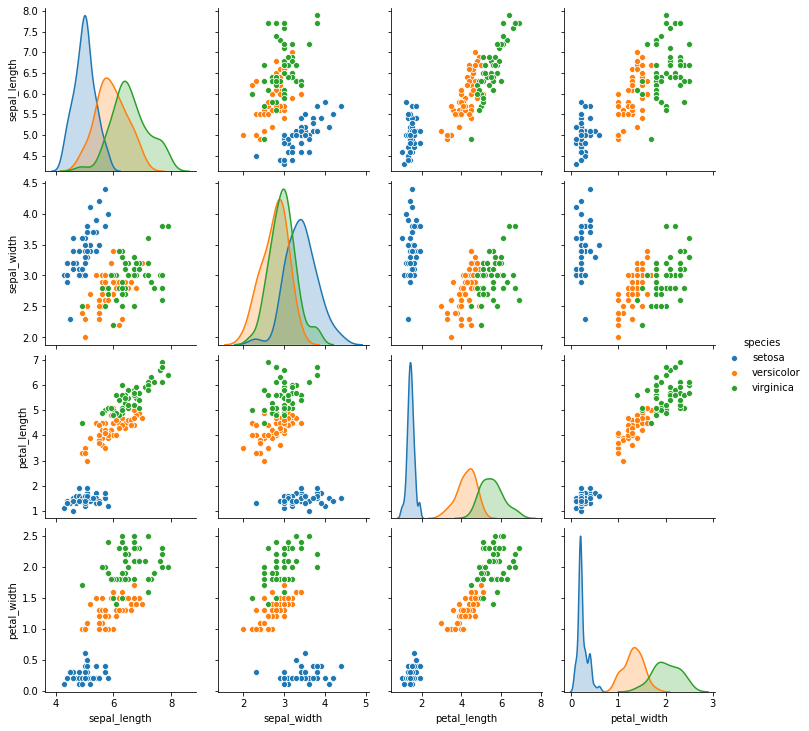

In [24]:
g = sns.pairplot(iris, hue="species")


In [31]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(iris_num)
    bic.append(gmm.bic(iris_num))
    print(bic)

num_result = np.argmin(bic)
print('el número de clusters es {}'.format(num_result+1))

[829.9781545093942]
[829.9781545093942, 574.017832720746]
[829.9781545093942, 574.017832720746, 580.8594247694392]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912, 729.0859301044302]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912, 729.0859301044302, 787.447225223097]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912, 729.0859301044302, 787.447225223097, 761.9809970822251]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912, 729.0859301044302, 787.447225223097, 761.9809970822251, 818.2979299067747]
[829.9781545093942, 574.017832720746, 580.8594247694392, 629.7790287186779, 677.0639777023912, 729.0859301044302, 787.447225223097, 761.98099708222

In [0]:
gmm = mixture.GaussianMixture(n_components=num_result+1,covariance_type='full').fit(iris_num)

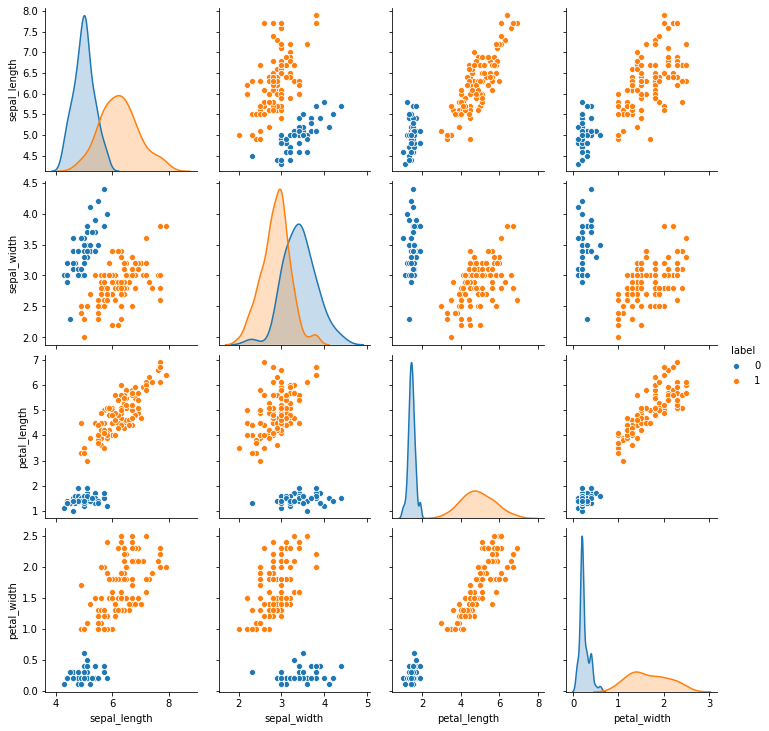

In [35]:
grouped = gmm.predict(iris_num)
iris_num['label'] = grouped
g = sns.pairplot(iris_num, hue="label")